# 绘制constant sin u_exact solution

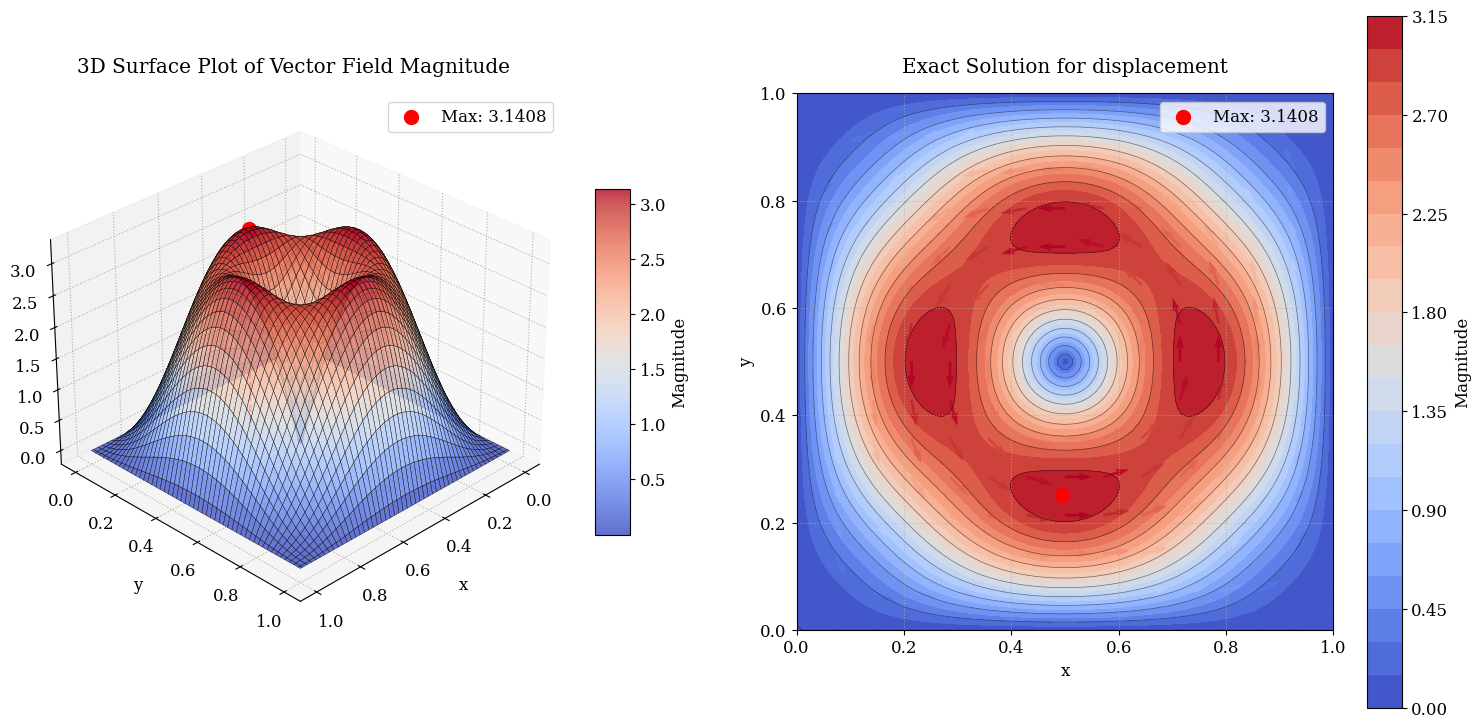

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# 定义函数
def f(x, y, A=1.0):
    """计算标量场 f = A * sin(πx)^2 * sin(πy)^2"""
    return A * (np.sin(np.pi * x)**2) * (np.sin(np.pi * y)**2)

def uex(x, y, A=1.0):
    """计算向量场 uex = curl(f) = (∂f/∂y, -∂f/∂x)"""
    # 计算偏导数
    df_dx = 2 * A * np.pi * np.sin(np.pi * x) * np.cos(np.pi * x) * (np.sin(np.pi * y)**2)
    df_dy = 2 * A * np.pi * (np.sin(np.pi * x)**2) * np.sin(np.pi * y) * np.cos(np.pi * y)
    
    # 旋度分量
    ux = df_dy
    uy = -df_dx
    
    # 返回向量场的模 (大小)
    return np.sqrt(ux**2 + uy**2)

# 创建网格
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

# 计算向量场模值
Z = uex(X, Y)

# 找到最大值位置 (使用NumPy替代SciPy)
max_index = np.unravel_index(np.argmax(Z), Z.shape)
max_point = (X[max_index], Y[max_index])
max_value = Z[max_index]

# 设置绘图风格
#plt.style.use('seaborn-whitegrid')
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'text.usetex': False,
    'axes.grid': True,
    'grid.linestyle': ':',
    'grid.alpha': 0.7
})

# 创建图形
fig = plt.figure(figsize=(15, 8))

# 三维曲面图
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm, 
                      rstride=2, cstride=2, 
                      edgecolor='k', linewidth=0.25, 
                      alpha=0.8)

# 标记最大值点
ax1.scatter(max_point[0], max_point[1], max_value, 
           color='red', s=100, label=f'Max: {max_value:.4f}')
ax1.plot([max_point[0], max_point[0]], [max_point[1], max_point[1]], [0, max_value],
        color='red', linestyle='--', linewidth=1.5)

# 设置三维图属性
ax1.set_xlabel('x', labelpad=10)
ax1.set_ylabel('y', labelpad=10)
ax1.set_zlabel(r'$|\mathbf{u}_{ex}|$', labelpad=10)
ax1.set_title('3D Surface Plot of Vector Field Magnitude', pad=15)
ax1.view_init(elev=30, azim=45)  # 调整视角
ax1.legend()

# 添加颜色条
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10, label='Magnitude')

# 俯视图 (等高线图)
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, Z, 20, cmap=cm.coolwarm)
ax2.contour(X, Y, Z, 10, colors='k', linewidths=0.5, alpha=0.5)

# 标记最大值点
ax2.scatter(max_point[0], max_point[1], color='red', s=100, label=f'Max: {max_value:.4f}')

# 添加向量箭头表示方向
arrow_density = 15  # 减少箭头密度
x_arr = np.linspace(0, 1, arrow_density)
y_arr = np.linspace(0, 1, arrow_density)
X_arr, Y_arr = np.meshgrid(x_arr, y_arr)

# 计算向量分量
df_dx = 2 * np.pi * np.sin(np.pi * X_arr) * np.cos(np.pi * X_arr) * (np.sin(np.pi * Y_arr)**2)
df_dy = 2 * np.pi * (np.sin(np.pi * X_arr)**2) * np.sin(np.pi * Y_arr) * np.cos(np.pi * Y_arr)
U = df_dy
V = -df_dx

# 归一化箭头长度
magnitude = np.sqrt(U**2 + V**2)
U_norm = U / (magnitude + 1e-8)  # 避免除以零
V_norm = V / (magnitude + 1e-8)  # 避免除以零

# 绘制归一化箭头
ax2.quiver(X_arr, Y_arr, U_norm, V_norm, magnitude, 
           cmap=cm.coolwarm, scale=20, width=0.005, 
           headwidth=3, headlength=5, headaxislength=4.5)

# 设置俯视图属性
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Exact Solution for displacement', pad=15)
ax2.set_aspect('equal')
ax2.legend()

# 添加颜色条
fig.colorbar(contour, ax=ax2, label='Magnitude')

# 添加整体标题
#plt.suptitle(r'Visualization of $\mathbf{u}_{ex} = \nabla \times (A \sin^2(\pi x) \sin^2(\pi y))$', 
#             fontsize=16, y=0.98)

# 调整布局
plt.tight_layout()
plt.subplots_adjust(top=0.9, wspace=0.15)

# 显示图形
plt.show()

# 绘制constant p_exact

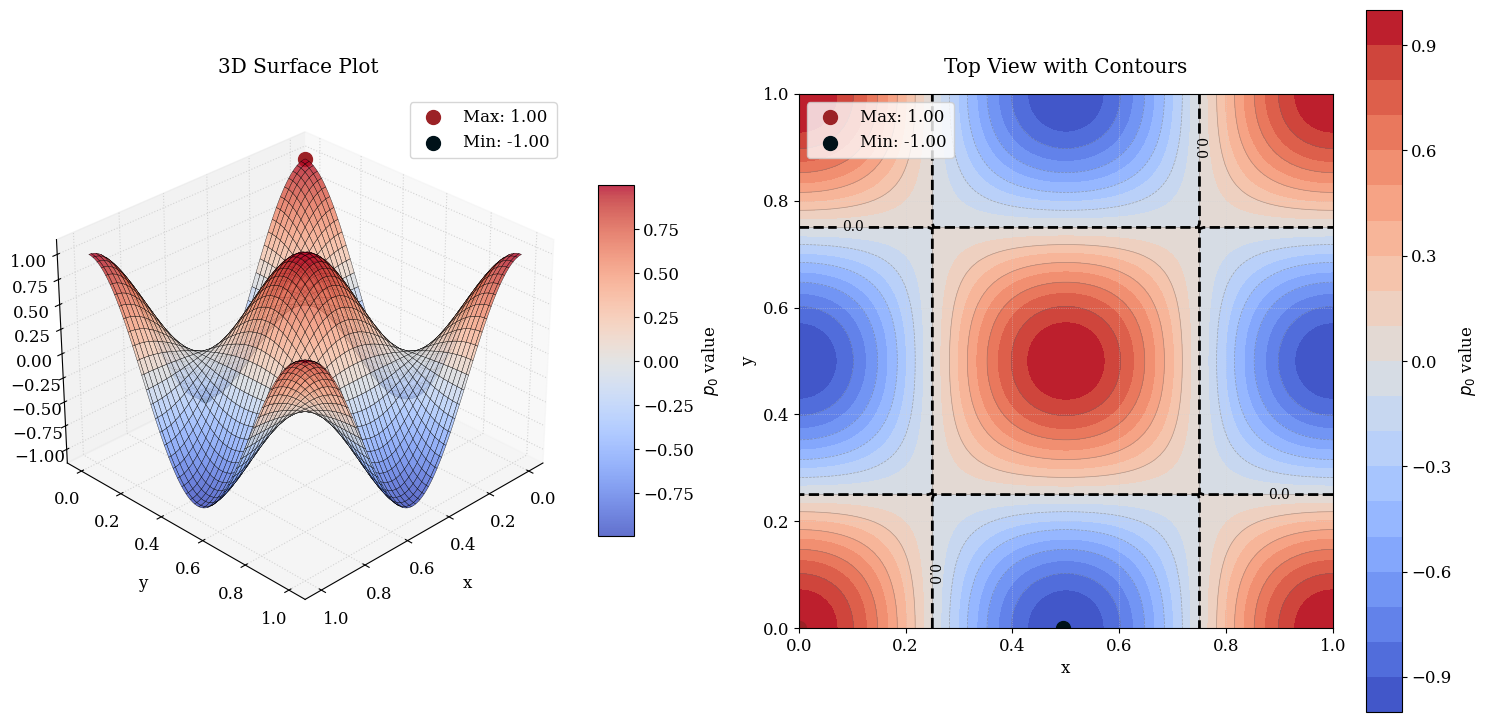

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# 定义函数
def p0(x, y):
    """计算函数 p0 = cos(2πx) * cos(2πy)"""
    return np.cos(2 * np.pi * x) * np.cos(2 * np.pi * y)

# 创建网格
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

# 计算函数值
Z = p0(X, Y)

# 找到最大值和最小值位置
max_index = np.unravel_index(np.argmax(Z), Z.shape)
min_index = np.unravel_index(np.argmin(Z), Z.shape)
max_point = (X[max_index], Y[max_index])
min_point = (X[min_index], Y[min_index])
max_value = Z[max_index]
min_value = Z[min_index]

# 设置绘图风格 - 移除无效参数
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'text.usetex': False,
    'axes.grid': True,
    'grid.linestyle': ':',
    'grid.alpha': 0.7,
    'grid.color': 'lightgray'
})

# 创建图形
fig = plt.figure(figsize=(15, 8))
#fig.suptitle(r'Visualization of $p_0 = \cos(2\pi x) \cos(2\pi y)$', 
#             fontsize=16, y=0.98)

# 三维曲面图 - 使用coolwarm颜色映射
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm,  # 使用coolwarm
                      rstride=2, cstride=2, 
                      edgecolor='k', linewidth=0.25, 
                      alpha=0.8)

# 标记最大值点和最小值点
ax1.scatter(max_point[0], max_point[1], max_value, 
           color='#9b2226', s=100, label=f'Max: {max_value:.2f}')  # 深红色
ax1.scatter(min_point[0], min_point[1], min_value, 
           color='#001219', s=100, label=f'Min: {min_value:.2f}')  # 深蓝色

# 设置三维图属性
ax1.set_xlabel('x', labelpad=10)
ax1.set_ylabel('y', labelpad=10)
ax1.set_zlabel(r'$p_0$', labelpad=10)
ax1.set_title('3D Surface Plot', pad=15)
ax1.view_init(elev=30, azim=45)  # 调整视角
ax1.legend()

# 添加颜色条
cbar1 = fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)
cbar1.set_label(r'$p_0$ value')

# 俯视图 (等高线图) - 使用coolwarm颜色映射
ax2 = fig.add_subplot(122)

# 正确设置等高线颜色
contour = ax2.contourf(X, Y, Z, 20, cmap=cm.coolwarm)  # 填充等高线使用coolwarm
contour_lines = ax2.contour(X, Y, Z, 10, colors='dimgray', linewidths=0.5, alpha=0.5)  # 单独设置线颜色

# 标记最大值点和最小值点
ax2.scatter(max_point[0], max_point[1], color='#9b2226', s=100, label=f'Max: {max_value:.2f}')
ax2.scatter(min_point[0], min_point[1], color='#001219', s=100, label=f'Min: {min_value:.2f}')

# 添加零等高线
zero_contour = ax2.contour(X, Y, Z, levels=[0], colors='black', linewidths=2, linestyles='dashed')
ax2.clabel(zero_contour, inline=True, fontsize=10, fmt='%1.1f')

# 设置俯视图属性
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Top View with Contours', pad=15)
ax2.set_aspect('equal')
ax2.legend()

# 添加颜色条
cbar2 = fig.colorbar(contour, ax=ax2)
cbar2.set_label(r'$p_0$ value')

# 添加网格线以突出特征
ax2.grid(True, which='both', linestyle=':', linewidth=0.5)

# 调整布局
plt.tight_layout()
plt.subplots_adjust(top=0.9, wspace=0.15)

# 显示图形
plt.show()